# R for Data Science (2e)

<img src="https://r4ds.hadley.nz/diagrams/data-science/base.png" width="400px">

In [1]:
#install.packages("tidyverse")
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 1 Data visualization

## 1.1 Introduction

ggplot2 -> grammar of graphics. aesthetic mappings and geometric objects.

**palmerpenguins package** includes the penguins dataset containing body measurements for penguins on three islands in the Palmer Archipelago, and the **ggthemes package**, which offers a colorblind safe color palette.

In [2]:
#install.packages("palmerpenguins")
library(palmerpenguins)

#install.packages("ggthemes")
library(ggthemes)


Attaching package: ‘palmerpenguins’


The following objects are masked from ‘package:datasets’:

    penguins, penguins_raw




*Do penguins with longer flippers weigh more or less than penguins with shorter flippers? What does the relationship between flipper length and body mass look like? Is it positive? Negative? Linear? Nonlinear? Does the relationship vary by the species of the penguin? How about by the island where the penguin lives?*

**penguins data frame**: A data frame is a rectangular collection of variables (in the columns) and observations (in the rows). **penguins** contains 344 observations.

A **variable** is a quantity, quality, or property that you can measure.

A **value** is the state of a variable when you measure it. The value of a variable may change from measurement to measurement.

An **observatio**n is a set of measurements made under similar conditions (you usually make all of the measurements in an observation at the same time and on the same object). An observation will contain several values, each associated with a different variable. We’ll sometimes refer to an observation as a **data point**.

**Tabular data** is a set of values, each associated with a variable and an observation. Tabular data is tidy if each value is placed in its own “cell”, each variable in its own column, and each observation in its own row.

In this context, a variable refers to an attribute of all the penguins, and an observation refers to all the attributes of a single penguin.

In [3]:
# tibble is special data frames

#penguins

glimpse(penguins)

# View(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


In [4]:
?penguins

penguins {palmerpenguins},R Documentation


With **ggplot2**, you begin a plot with the function **ggplot()**, defining a plot object that you then add **layers** to.

The first argument of ggplot() is the **dataset** to use in the graph and so **ggplot(data = penguins)** creates an empty graph that is primed to display the penguins data, but since we haven’t told it how to visualize it yet, for now it’s empty. This is not a very exciting plot, but you can think of it like an empty canvas you’ll paint the remaining layers of your plot onto.

Next, we need to tell ggplot() how the information from our data will be visually represented. The **mapping argument** of the ggplot() function defines how variables in your dataset are mapped to **visual properties (aesthetics)** of your plot. The mapping argument is always defined in the **aes()** function, and the **x and y arguments** of aes() specify which variables to map to the **x and y axes**.

We have not yet articulated, in our code, how to represent the observations from our data frame on our plot. To do so, we need to define a **geom: the geometrical object** that a plot uses **to represent data**. These geometric objects are made available in ggplot2 with functions that start with **geom_**.

*Bar charts use bar geoms (geom_bar()), line charts use line geoms (geom_line()), boxplots use boxplot geoms (geom_boxplot()), scatterplots use point geoms (geom_point()).*

The function **geom_point()** adds a layer of points to your plot, which creates a **scatterplot**.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


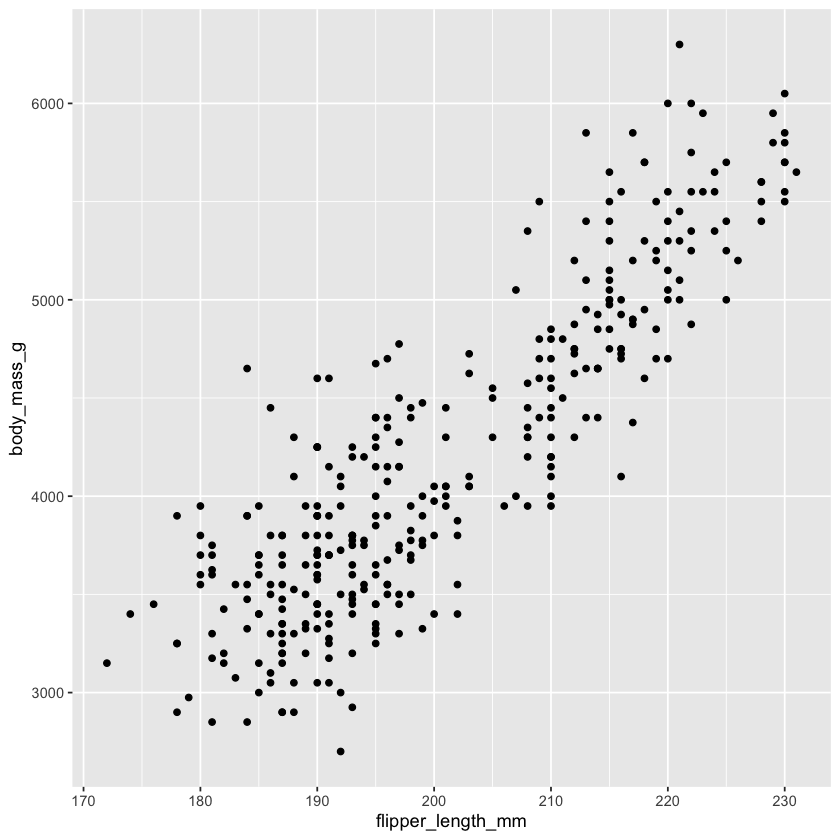

In [5]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point()

*“What does the relationship between flipper length and body mass look like?”*

The relationship appears to be positive (as flipper length increases, so does body mass), fairly linear (the points are clustered around a line instead of a curve), and moderately strong (there isn’t too much scatter around such a line).

Penguins with longer flippers are generally larger in terms of their body mass.

### 1.2.4 Adding aesthetics and layers

Scatterplots are useful for displaying the relationship between two numerical variables, but it’s always a good idea to be skeptical of any apparent relationship between two variables and ask if there may be other variables that explain or change the nature of this apparent relationship.

*Does the relationship between flipper length and body mass differ by species?*

When a categorical variable is mapped to an aesthetic, ggplot2 will automatically assign a unique value of the aesthetic (here a unique color) to each unique level of the variable (each of the three species), a process known as **scaling**. ggplot2 will also add a legend that explains which values correspond to which levels.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


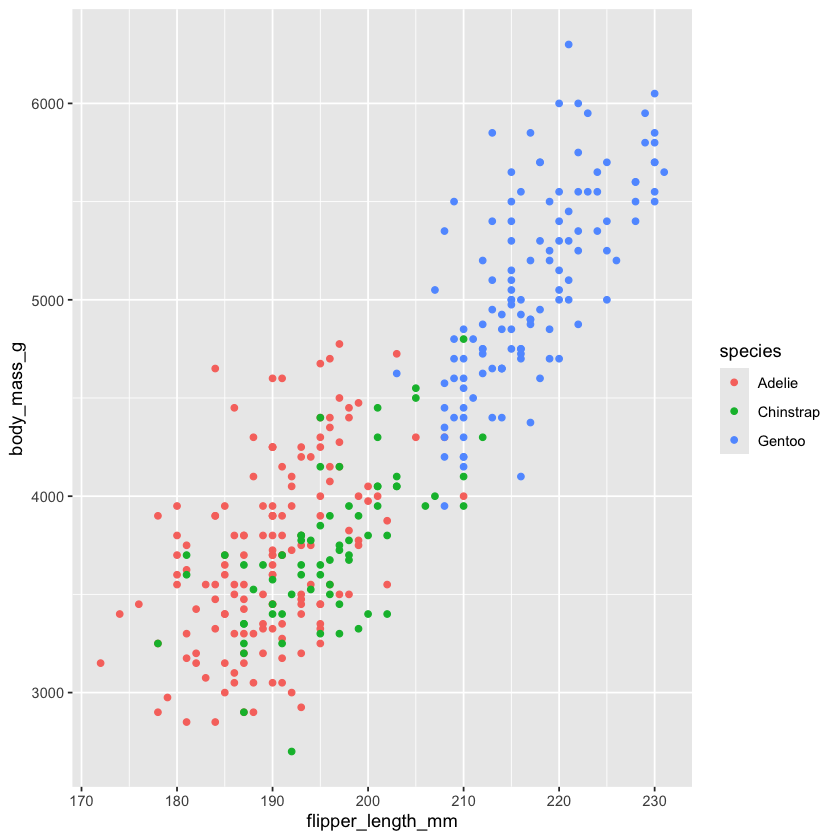

In [6]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = species)
) +
  geom_point()

Now let’s add one more layer: **a smooth curve** displaying the relationship between body mass and flipper length.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


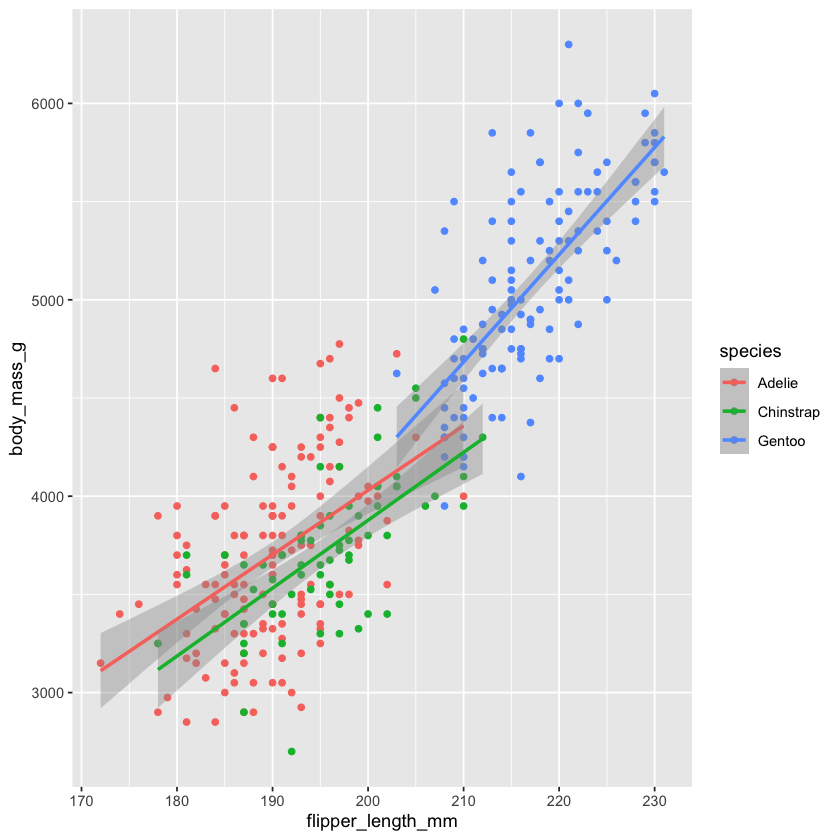

In [7]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = species)
) +
  geom_point() +
  geom_smooth(method = "lm") # draw the line of best fit based on a linear model

When aesthetic mappings are defined in ggplot(), at the global level, they’re passed down to each of the subsequent geom layers of the plot. However, each geom function in ggplot2 can also take a mapping argument, which allows for aesthetic mappings at the local level that are added to those **inherited from the global level**.

Since we want points to be colored based on species but don’t want the lines to be separated out for them, we should specify color = species for geom_point() only.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


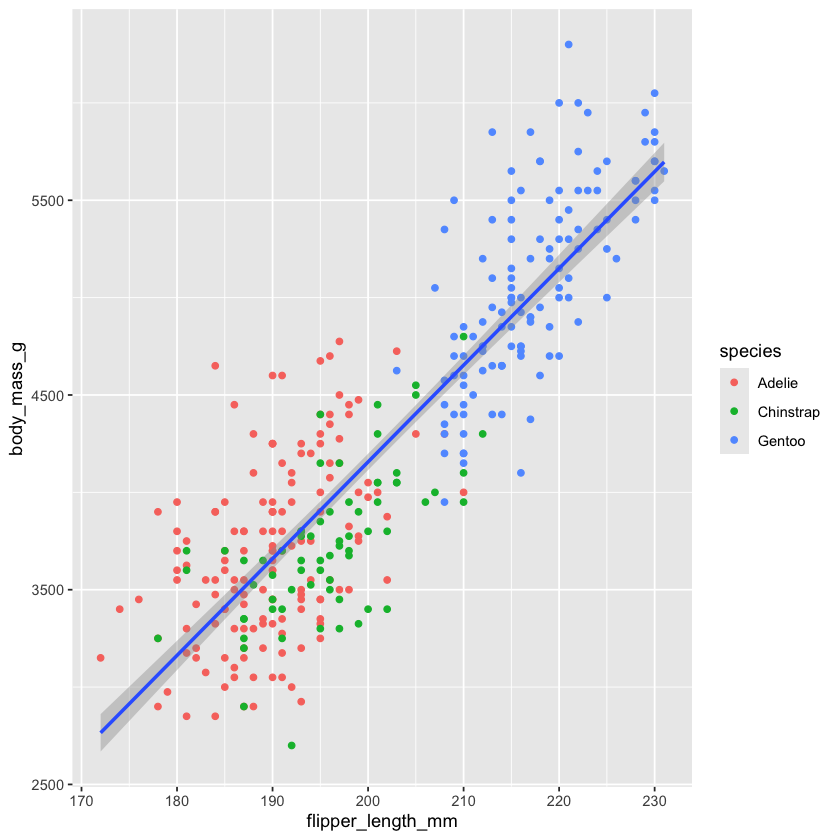

In [8]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point(mapping = aes(color = species)) +
  geom_smooth(method = "lm")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


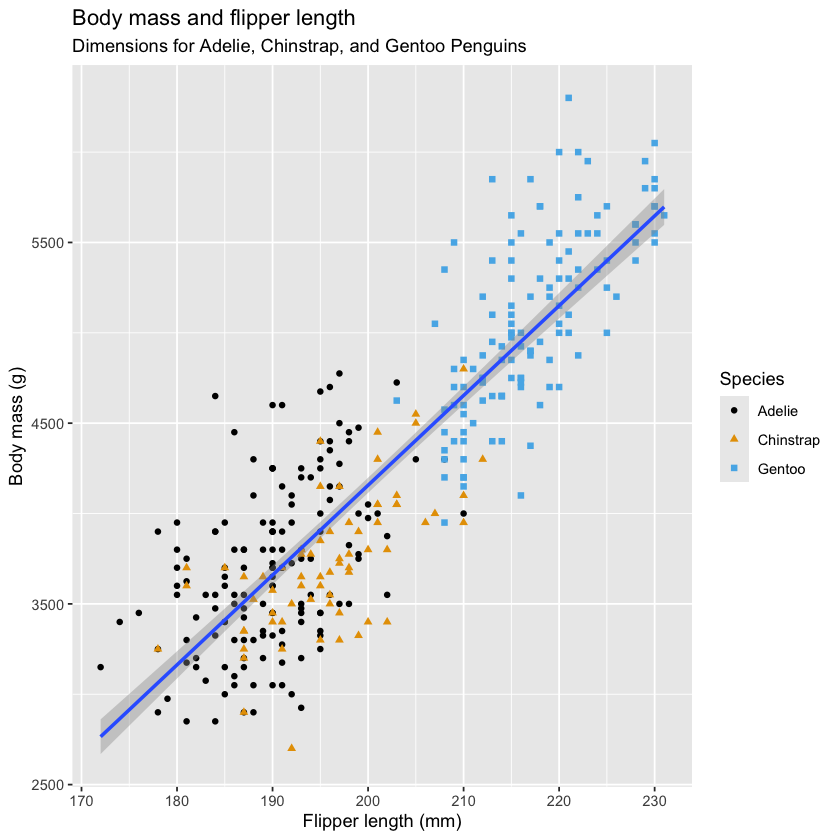

In [9]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point(aes(color = species, shape = species)) +
  geom_smooth(method = "lm") +
  labs( # labels
    title = "Body mass and flipper length",
    subtitle = "Dimensions for Adelie, Chinstrap, and Gentoo Penguins",
    x = "Flipper length (mm)", y = "Body mass (g)",
    color = "Species", shape = "Species"
  ) +
  scale_color_colorblind() # improve the color palette to be colorblind safe

### 1.2.5 Exercises

1. How many rows are in penguins? How many columns?

There are 344 rows and 8 columns.

2. What does the bill_depth_mm variable in the penguins data frame describe? Read the help for ?penguins to find out.

bill_length_mm: a number denoting bill length (millimeters).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


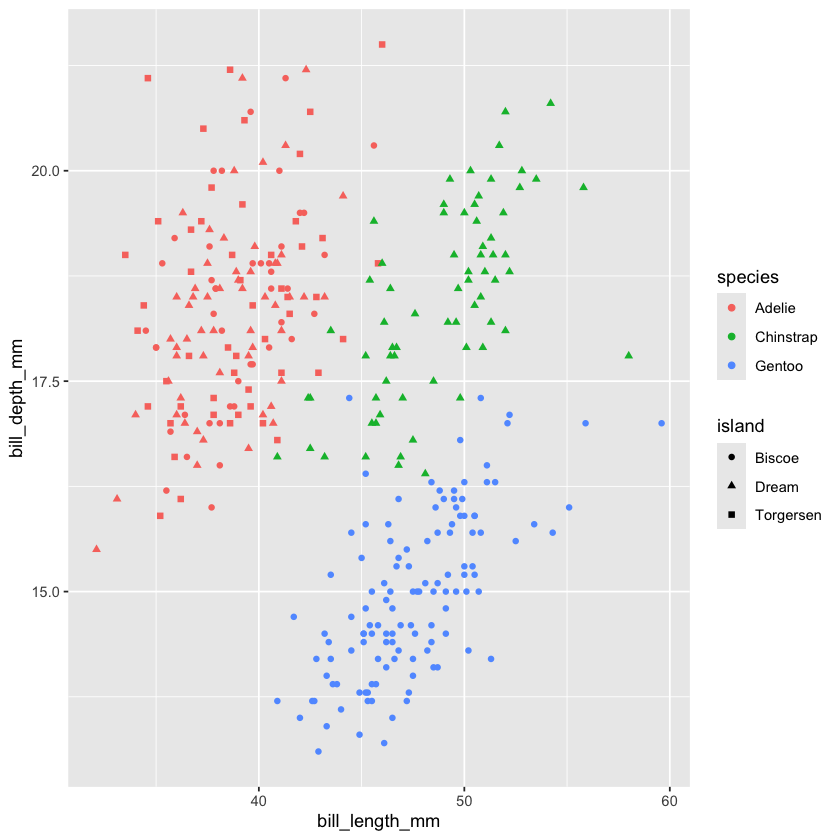

In [10]:
# 3. Make a scatterplot of bill_depth_mm vs. bill_length_mm.
# That is, make a scatterplot with bill_depth_mm on the y-axis and bill_length_mm
# on the x-axis. Describe the relationship between these two variables.

ggplot(
    data = penguins,
    mapping = aes(x = bill_length_mm, y = bill_depth_mm, color = species, shape = island)
) + 
geom_point()

# Every different species has its own features for bill length and bill depth.
# For example, Chinstrap species has higher bill length and bill depth.

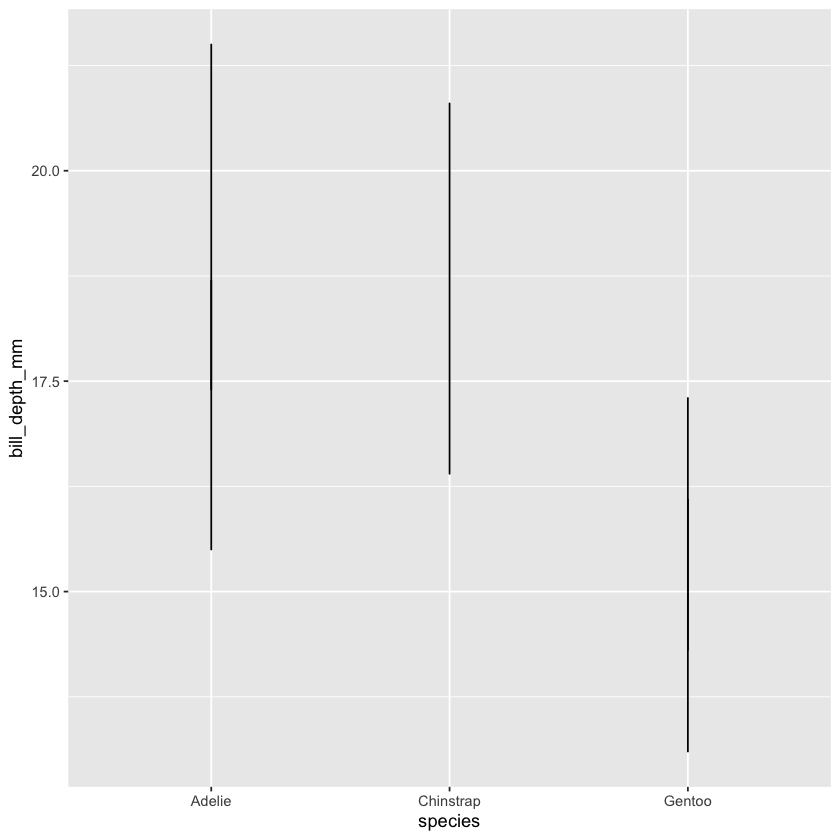

In [11]:
# 4. What happens if you make a scatterplot of species vs. bill_depth_mm?
# What might be a better choice of geom?

ggplot(
    data = penguins,
    mapping = aes(x = species, y = bill_depth_mm)
) + 
geom_line()

# It shows the interval of bill depth for every species.

5. Why does the following give an error and how would you fix it?

`ggplot(data = penguins) + 
  geom_point()`

`geom_point()` requires the following missing aesthetics: x and y.

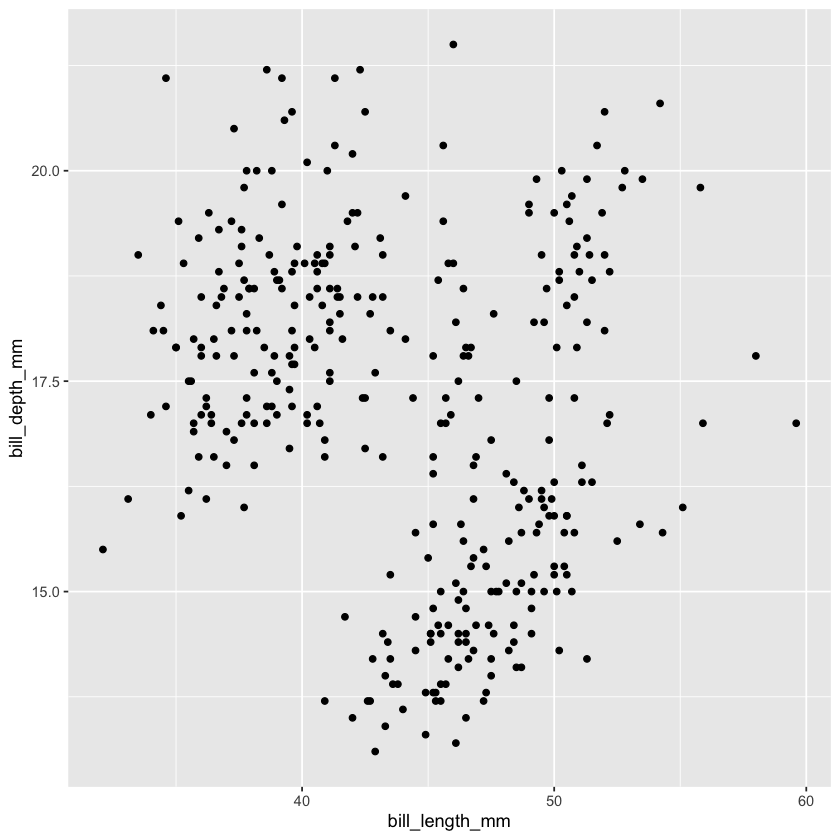

In [12]:
# 6. What does the na.rm argument do in geom_point()?
# What is the default value of the argument?
# Create a scatterplot where you successfully use this argument set to TRUE.

# Def. is false

# na.rm: If FALSE, the default, missing values are removed with a warning.
# If TRUE, missing values are silently removed.

ggplot(
    data = penguins,
    mapping = aes(x = bill_length_mm, y = bill_depth_mm)
) + 
geom_point(na.rm = TRUE)

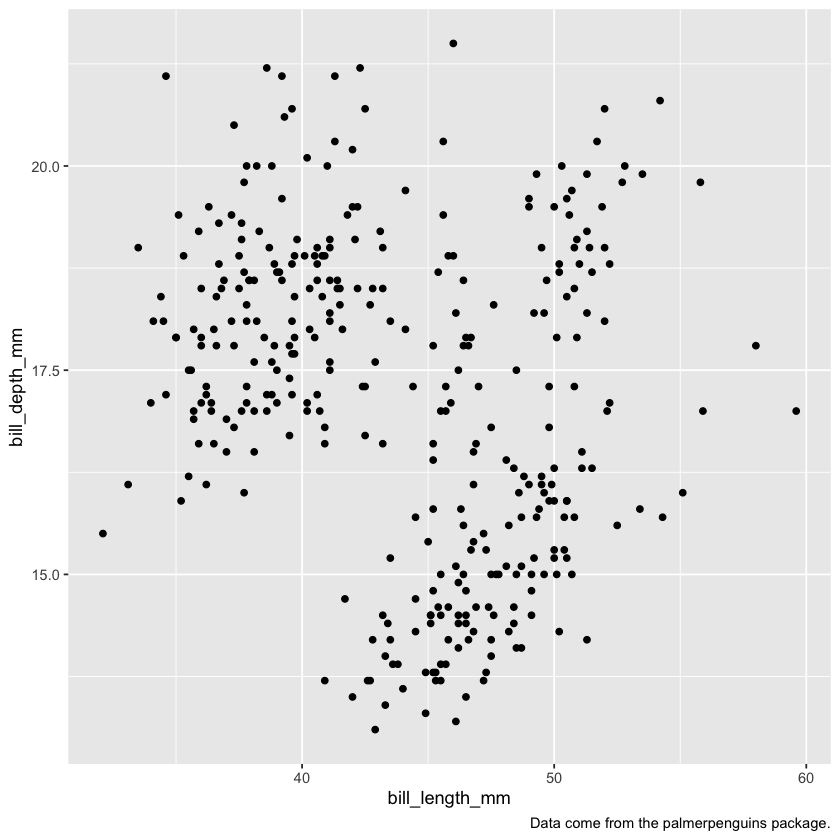

In [13]:
# 7. Add the following caption to the plot you made in the previous exercise:
# “Data come from the palmerpenguins package.”
# Hint: Take a look at the documentation for labs().

ggplot(
    data = penguins,
    mapping = aes(x = bill_length_mm, y = bill_depth_mm)
) + 
geom_point(na.rm = TRUE) +
labs(caption = "Data come from the palmerpenguins package.")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


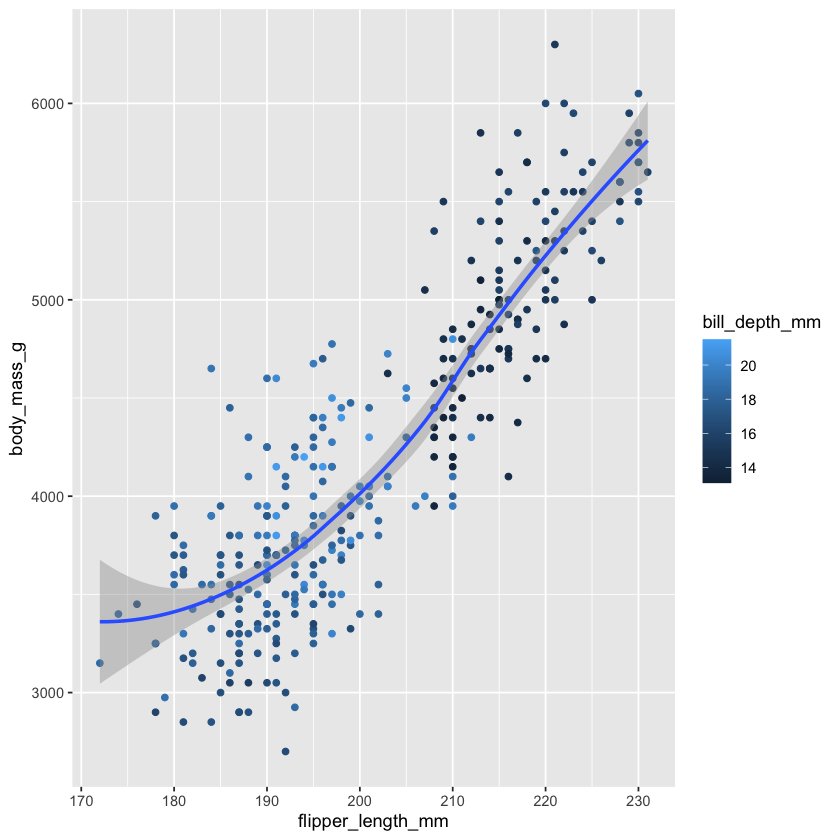

In [14]:
# 8. Recreate the following visualization.
# What aesthetic should bill_depth_mm be mapped to?
# And should it be mapped at the global level or at the geom level?

ggplot(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
) + 
geom_point(aes(color = bill_depth_mm)) +
geom_smooth()

# I mapped color to bill depth mm at the local level because for geom smooth
# we just want 1 line, we do not want separate lines for every bill depth mm

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


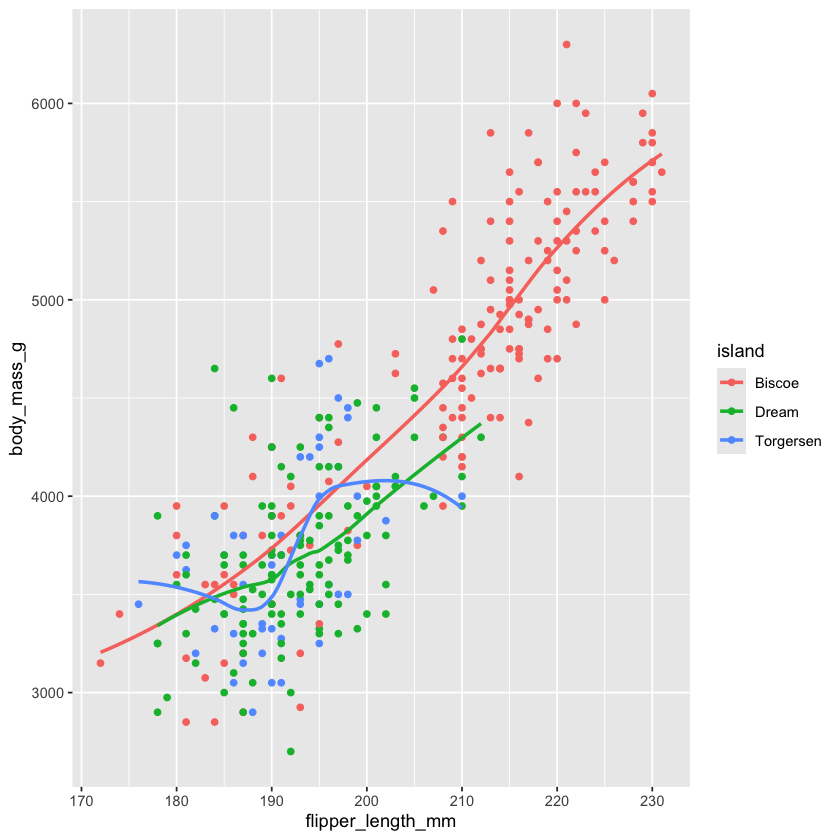

In [15]:
# 9. Run this code in your head and predict what the output will look like.
# Then, run the code in R and check your predictions.

ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = island)
) +
  geom_point() +
  geom_smooth(se = FALSE)

# distributed points colored by island (3 different colors) and
# 3 different lines for every species

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


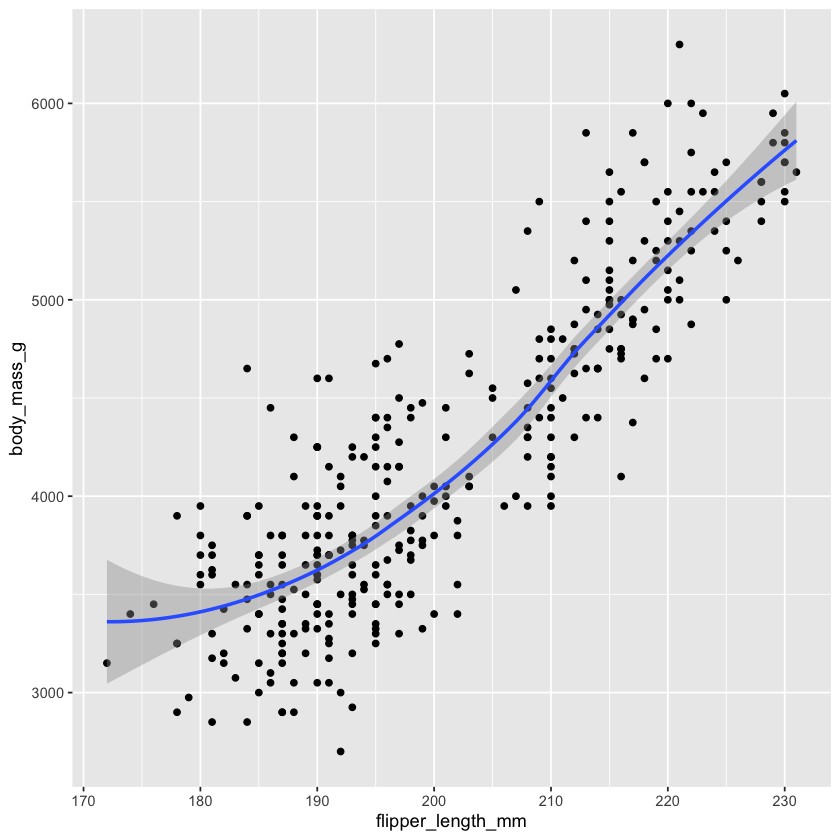

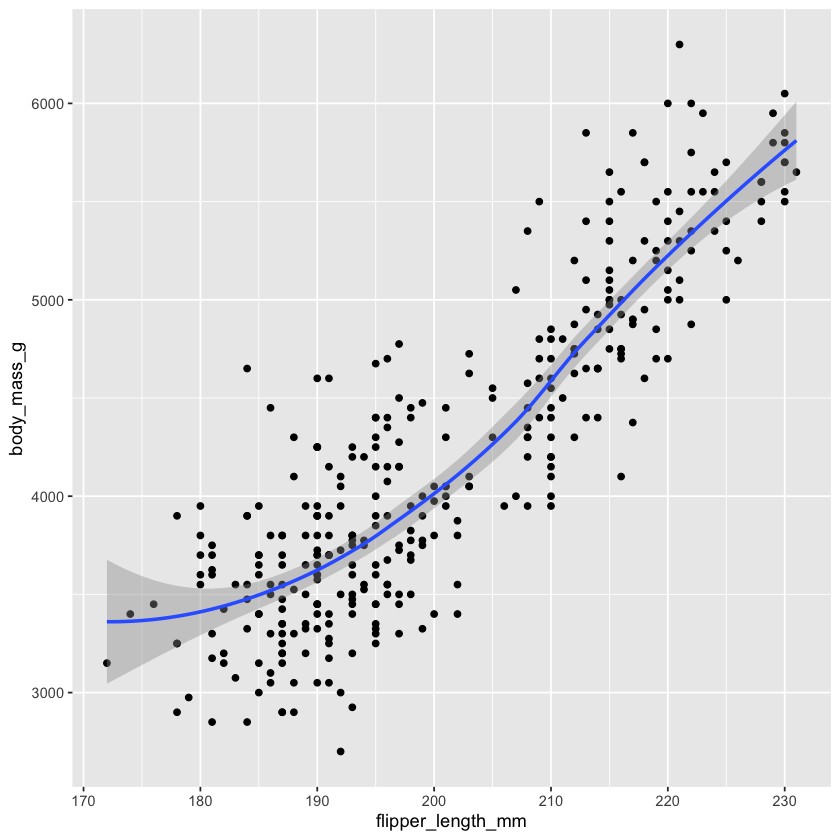

In [16]:
# 10. Will these two graphs look different? Why/why not?

ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point() +
  geom_smooth()

ggplot() +
  geom_point(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
  ) +
  geom_smooth(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
  )

# They will look the same, second function just overwrites
# which it already inherits from the global level.